In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [12]:
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import load_dataset_config
dataset_name = 'juvenile'
config_file = f'../dataset_configs/{dataset_name}_dataset.json'
dsconfig= load_dataset_config(config_file)

from analysis_config import juvenile_window_name_to_frames
window_name = 'time_window_5s'
window = juvenile_window_name_to_frames[window_name]

capacity_dir = os.path.join(dsconfig.results_dir, 'capacity')
seed = 9991
window_key = f'window_{window[0]}_{window[1]}'
M = 100
conditions = dsconfig.conditions

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/capacity_vs_num_neurons'
os.makedirs(fig_dir, exist_ok=True)


In [13]:
Ns = [200, 300, 400, 500, 600, 700]

dfs = []
for N in Ns:
    jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'
    if N <=100:
        jobname += 'gaussianize_True'
    input_dir = pjoin(capacity_dir, jobname)
    df_result_file = pjoin(input_dir, f'df_result.pkl')
    dfs.append(pd.read_pickle(df_result_file))


In [14]:
capdf = pd.concat(dfs, keys=Ns, names=['N'])
capdf = capdf[capdf.index.get_level_values('shuffle') == False]
capdf.reset_index(level=['condition', 'window_0', 'N'], inplace=True)
capdf['start_time'] = (capdf['window_0'] / 7.5 - 2.3).round()

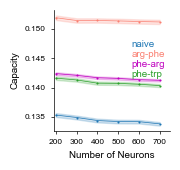

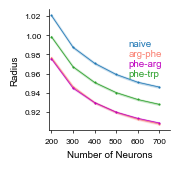

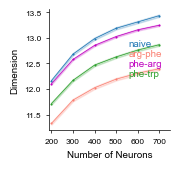

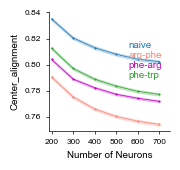

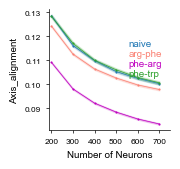

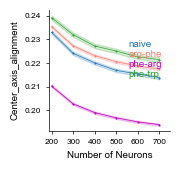

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from catrace.visualize import reformat_legend

def plot_measure_over_param(capdf, measure='capacity', param_col='start_time', hue_col='condition', errorbar='se'):
    """
    Plot a measure (e.g., capacity) over time windows with conditions as hue.
    
    Parameters:
    - capdf: DataFrame containing the data.
    - measure: The measure to plot (default is 'capacity').
    - param_col: Column name for the parameter (default is 'start_time').
    - hue_col: Column name for the condition (default is 'condition').
    """
    fig, ax = plt.subplots(figsize=(1.9, 1.8))
    color_dict = {'naive': 'tab:blue', 
                'arg-phe': 'salmon',
                'phe-arg': 'm',
                'phe-trp': 'tab:green',
    }
    sns.lineplot(
        data=capdf.sort_values(param_col),
        x=param_col, y=measure, hue=hue_col,
        estimator='mean',      # aggregate by mean at each (window_0, condition)
        errorbar=errorbar,         # shaded band
        marker='o',            # optional: markers at means
        markersize=1.5,       # optional: size of markers
        ax=ax,
        palette=color_dict,   # use custom color palette
        linewidth=0.5,  # optional: line width
        # No outline for marker
        markeredgewidth=0,  # no outline for markers
    )
    ax.set_ylabel(measure.capitalize(), fontsize=7)
    if param_col == 'N':
        param_col_name = 'Number of Neurons'
    else:
        param_col_name = param_col
    ax.set_xlabel(param_col_name, fontsize=7)
    ax.legend(title=hue_col)
    reformat_legend(ax, desired_order=["naive", "arg-phe", "phe-arg", "phe-trp"], labelspacing=0.1, loc=(0.4,0.4))

    # Set x and y tick label fontsize
    ax.tick_params(axis='both', which='major', labelsize=6)
    # use multilocator to set x tick interval of 100
    if param_col == 'N':
        ax.xaxis.set_major_locator(plt.MultipleLocator(100))
        ax.set_xlim(190, 750)

    # Decrease the length of x and y ticks
    ax.tick_params(axis='x', length=2.5)
    ax.tick_params(axis='y', length=2.5)
    sns.despine(ax=ax)
    plt.tight_layout()
    return fig, ax


for measure in ['capacity', 'radius', 'dimension', 'center_alignment', 'axis_alignment', 'center_axis_alignment']:
    fig, ax = plot_measure_over_param(capdf, measure=measure, param_col='N', hue_col='condition')
    # fig.savefig(pjoin(paper_fig_dir, f'{measure}_vs_num_neurons.pdf'), bbox_inches='tight')

In [16]:
capdf

N condition  \
fish_id                   odor1 odor2 window_1 shuffle seed                   
2021-07-15-DpOBEM-N2_Dp   GCA   TCA   76       False   9999   200     naive   
                                Phe   76       False   9995   200     naive   
                          Arg   TDCA  76       False   9992   200     naive   
                          GCA   Trp   76       False   9997   200     naive   
                          Arg   TCA   76       False   10004  200     naive   
...                                                           ...       ...   
2021-11-26-DpOBEM-JH24_Dp Arg   Trp   76       False   56486  700   phe-trp   
                          TCA   TDCA  76       False   56487  700   phe-trp   
                          Arg   GCA   76       False   56489  700   phe-trp   
                          Phe   Trp   76       False   56484  700   phe-trp   
                          TDCA  Trp   76       False   56479  700   phe-trp   

                                                              window_0  \
fish_id                   odor1 odor2 window_1 shuffle seed              
2021-07-15-DpOBEM-N2_Dp   GCA   TCA   76       False   9999         38   
                                Phe   76       False   9995         38   
                          Arg   TDCA  76       False   9992         38   
                          GCA   Trp   76       False   9997         38   
                          Arg   TCA   76       False   10004        38   
...                                                                ...   
2021-11-26-DpOBEM-JH24_Dp Arg   Trp   76       False   56486        38   
                          TCA   TDCA  76       False   56487        38   
                          Arg   GCA   76       False   56489        38   
                          Phe   Trp   76       False   56484        38   
                          TDCA  Trp   76       False   56479        38   

                                                              capacity  \
fish_id                   odor1 odor2 window_1 shuffle seed              
2021-07-15-DpOBEM-N2_Dp   GCA   TCA   76       False   9999   0.114577   
                                Phe   76       False   9995   0.136023   
                          Arg   TDCA  76       False   9992   0.143261   
                          GCA   Trp   76       False   9997   0.125484   
                          Arg   TCA   76       False   10004  0.169773   
...                                                                ...   
2021-11-26-DpOBEM-JH24_Dp Arg   Trp   76       False   56486  0.132439   
                          TCA   TDCA  76       False   56487  0.134991   
                          Arg   GCA   76       False   56489  0.157534   
                          Phe   Trp   76       False   56484  0.133544   
                          TDCA  Trp   76       False   56479  0.149370   

                                                              dimension  \
fish_id                   odor1 odor2 window_1 shuffle seed               
2021-07-15-DpOBEM-N2_Dp   GCA   TCA   76       False   9999   13.119545   
                                Phe   76       False   9995   11.860908   
                          Arg   TDCA  76       False   9992   11.423493   
                          GCA   Trp   76       False   9997   13.002422   
                          Arg   TCA   76       False   10004  10.000716   
...                                                                 ...   
2021-11-26-DpOBEM-JH24_Dp Arg   Trp   76       False   56486  12.278123   
                          TCA   TDCA  76       False   56487  12.755212   
                          Arg   GCA   76       False   56489  11.037067   
                          Phe   Trp   76       False   56484  12.129383   
                          TDCA  Trp   76       False   56479  11.765649   

                                                                radius  \
fish_id                   odor1 odor2 window_1 shuffle seed 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accdf = capdf
orig_metric_name = 'capacity'

# Suppose your dataframe is called df
# Group and compute mean + std
summary = accdf.groupby(['N', 'condition']).agg(
    mean_cv_acc=(orig_metric_name, 'mean'),
    std_cv_acc=(orig_metric_name, 'std'),
    sem_cv_acc=(orig_metric_name, 'sem'),
).reset_index()
summary

,N,condition,mean_cv_acc,std_cv_acc,sem_cv_acc
0,200,arg-phe,0.151894,0.031655,0.000385
1,200,naive,0.135304,0.021906,0.000327
2,200,phe-arg,0.142371,0.019810,0.000229
3,200,phe-trp,0.141597,0.020179,0.000301
4,300,arg-phe,0.151424,0.030784,0.000375
5,300,naive,0.134886,0.021411,0.000319
6,300,phe-arg,0.142078,0.019075,0.000220
7,300,phe-trp,0.141288,0.019062,0.000284
8,400,arg-phe,0.151431,0.030195,0.000368
9,400,naive,0.134369,0.021052,0.000314


    Contrast        A        B  Paired  Parametric         T         dof  \
0  condition  arg-phe    naive   False        True  5.279514  222.987207   
1  condition  arg-phe  phe-arg   False        True  3.443124  205.430258   
2  condition  arg-phe  phe-trp   False        True  3.471980  217.509232   
3  condition    naive  phe-arg   False        True -2.990037  163.973267   
4  condition    naive  phe-trp   False        True -2.425560  178.000000   
5  condition  phe-arg  phe-trp   False        True  0.364402  186.862049   

  alternative         p-unc       BF10    hedges  
0   two-sided  3.069087e-07  4.117e+04  0.661613  
1   two-sided  6.968013e-04     34.016  0.418813  
2   two-sided  6.231098e-04      38.74  0.424016  
3   two-sided  3.219471e-03      9.331 -0.414180  
4   two-sided  1.628340e-02      2.427 -0.360055  
5   two-sided  7.159696e-01      0.155  0.048487  
    Contrast        A        B  Paired  Parametric         T         dof  \
0  condition  arg-phe    naive   F

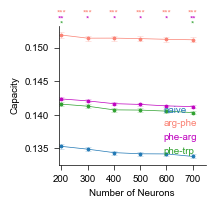

In [18]:
from matplotlib.ticker import MultipleLocator

plot_mode = 'paper' #'notebook' # 'paper'

if plot_mode == 'paper':
    figsize = (1.9, 1.8)
    markersize = 2
    linewidth = 0.5
else:
    figsize = (6, 5)
    markersize = 5
    linewidth = 1

color_dict = {'naive': 'tab:blue', 
              'arg-phe': 'salmon',
              'phe-arg': 'm',
              'phe-trp': 'tab:green',
}
fig, ax = plt.subplots(figsize=figsize)

# Add error bars manually for std
for condition in summary['condition'].unique():
    subset = summary[summary['condition'] == condition]
    ax.errorbar(
        subset['N'],
        subset['mean_cv_acc'],
        yerr=subset['sem_cv_acc'],  # use standard error of the mean #['std_cv_acc'], sem
        fmt='none', capsize=2,
        color=color_dict[condition],
        linewidth=0.5,
        # horizontal bar line width
        capthick=0.5,
        alpha=0.3
    )
# Plot with seaborn
# First: lines only, with alpha = 0.3
# 1) Markers only, fully opaque
sns.lineplot(
    data=summary,
    x='N',
    y='mean_cv_acc',
    hue='condition',
    marker='o',
    markersize=markersize,
    palette=color_dict,
    hue_order=reversed(dsconfig.conditions),
    ax=ax,
    linewidth=0,          # no connecting line
    alpha=1,              # markers opaque
    #markerfacecolor='none',
    mec=None,
    mew=0.7,
)

# 2) Lines only, transparent, same colors, no extra legend
sns.lineplot(
    data=summary,
    x='N',
    y='mean_cv_acc',
    hue='condition',
    palette=color_dict,
    hue_order=reversed(dsconfig.conditions),
    ax=ax,
    linewidth=linewidth,
    alpha=1,            # transparent lines
    marker=None,          # no markers this time
    legend=False,         # reuse legend from first call
    err_style="bars",
)


sns.despine(ax=ax)


import matplotlib.lines as mlines


# Get existing legend entries from seaborn
handles, labels = ax.get_legend_handles_labels()

# Pick your desired order (an ordered list of label names)
desired_order = ["naive", "arg-phe", "phe-arg", "phe-trp"]

# Reorder handles and labels
ordered_handles = []
ordered_labels = []

for name in desired_order:
    idx = labels.index(name)        # find the index for that label
    ordered_handles.append(handles[idx])
    ordered_labels.append(labels[idx])

# Create invisible handles (no line markers in legend)
dummy_handles = [mlines.Line2D([], [], linestyle='none') for _ in ordered_handles]

# Build the legend
legend = ax.legend(
    dummy_handles,
    ordered_labels,
    title=None,
    frameon=False,
    fontsize=7,
    loc='lower right'
)

# Color the text to match the actual line colors
for text_obj, real_handle in zip(legend.get_texts(), ordered_handles):
    try:
        color = real_handle.get_color()
    except AttributeError:
        color = real_handle.get_facecolor()
    text_obj.set_color(color)



# Set fontsize for x and y tick labels to 7
ax.tick_params(axis='both', which='both', labelsize=7)
# use multilocator to set x label interval as 100
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.set_ylabel("Capacity", fontsize=7)
ax.set_xlabel("Number of Neurons", fontsize=7)
ax.set_xlim((190, 750))


# Statistics
test_results_list = []
sample_sizes = Ns
for num_neurons in sample_sizes:
    #subdf = all_lda_df.xs(num_neurons, level='N')
    subdf = capdf[capdf['N'] == num_neurons].copy()
    subdf = subdf.set_index(['condition', 'N', 'window_0'],append=True)
    subdf = subdf.groupby(level=['fish_id', 'odor1', 'odor2', 'condition', 'N']).mean()
    # Convert subdf, which is a Series, to a DataFrame that contains one column
    #subdf = subdf.to_frame()

    #all_lda_df[all_lda_df['num_neurons'] == num_neurons]
    # Rename first column to 'mean_lda_cv_score'
    yname = 'capacity'

    from catrace.stats import apply_test_by_cond
    from catrace.visualize import pvalue_to_marker
    test_results = apply_test_by_cond(
        subdf,
        yname,
        naive_name='naive',
        cond_name='condition',
        test_type='kruskal',
        return_all_pairs=False,
        padjust='bonf',
    )
    test_results_list.append(test_results) 

    for idx, condition in enumerate(dsconfig.conditions):
        if condition == 'naive':
            continue
        pvalue = test_results['Dunn_naive']['p_values'][condition]
        marker, xoffset = pvalue_to_marker(pvalue)
        if marker != 'n.s.':
            yoffset = -0.0008 * idx
            # Put the marker to x=num_neurons, y=1
            ax.text(num_neurons + xoffset, 0.156+yoffset, marker, fontsize=6, ha='center', va='center', color=color_dict[condition])

odor_group_name = 'all_odors'
# save figure
fig.savefig(pjoin(fig_dir, f'capacity_n_curve_odor_pair_{odor_group_name}_seed{seed}.pdf'), bbox_inches='tight')




In [19]:
# Format statistics output
from catrace.stats import format_test_results_by_cond
for i, num_neurons in enumerate(sample_sizes):
    test_results = test_results_list[i]
    text_output = format_test_results_by_cond(test_results)
    print(f'Sample size {num_neurons}:')
    print(text_output)

Sample size 200:
(Kruskal–Wallis test, n = 465, d.f. = 3, H = 26.81, P = 6.5 × 10^-6). Group statistics: arg-phe: mean = 0.152 ± 0.0284 (n = 135); naive: mean = 0.135 ± 0.0187 (n = 90); phe-arg: mean = 0.142 ± 0.0159 (n = 150); and phe-trp: mean = 0.142 ± 0.0159 (n = 90). Nonparametric multiple comparisons against naive (n = 90): arg-phe, Q = 5.28, P = 9.2 × 10^-7, n = 90; phe-arg, Q = 2.99, P = 0.010, n = 150; and phe-trp, Q = 2.43, P = 0.049, n = 90.
Sample size 300:
(Kruskal–Wallis test, n = 465, d.f. = 3, H = 26.41, P = 7.8 × 10^-6). Group statistics: arg-phe: mean = 0.151 ± 0.0287 (n = 135); naive: mean = 0.135 ± 0.0195 (n = 90); phe-arg: mean = 0.142 ± 0.0165 (n = 150); and phe-trp: mean = 0.141 ± 0.0163 (n = 90). Nonparametric multiple comparisons against naive (n = 90): arg-phe, Q = 5.15, P = 1.7 × 10^-6, n = 90; phe-arg, Q = 2.93, P = 0.012, n = 150; and phe-trp, Q = 2.39, P = 0.054, n = 90.
Sample size 400:
(Kruskal–Wallis test, n = 465, d.f. = 3, H = 27.53, P = 4.6 × 10^-6).